In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pqcd
import h5py

from universality.gaussianprocess.utils import integrate_phi
from pqcd.utils import (
    to_GeV_per_cubic_femtometre, 
    to_nucleons_per_cubic_femtometre, 
    dyn_per_square_cm_to_GeV_per_cubic_femtometer,
)

In [2]:
CET_values = {
    'soft': [0.966, 0.176, 2.163/1000],
    'stiff': [0.978, 0.176, 3.542/1000]
}

muL, nL, pL = CET_values['soft']
epsilonL = pqcd.epsilon_func(muL, nL, pL)

X = 2
muH = 2.6
pQCDX = pqcd.pQCD(X)
nH, pH = pQCDX.nH(muH), pQCDX.pH(muH)
epsilonH = pqcd.epsilon_func(muH, nH, pH)

constraints = pqcd.constraints(muL, nL, pL, muH, nH, pH)
mu_array = np.linspace(muL, muH, 1000)

In [3]:
collated_eos_path = '../data/eos-draws-default/collated_np_all_post.csv'

In [4]:
collated_eos = pd.read_csv(collated_eos_path)
astro_weights = np.exp(collated_eos.logweight_total.values)

In [5]:
collated_eos

,eos,logweight_total,Mmax,pressurec2(baryon_density=2.8e+14),pressurec2(baryon_density=5.6e+14),pressurec2(baryon_density=1.68e+15),energy_densityc2(baryon_density=2.8e+14),energy_densityc2(baryon_density=5.6e+14),energy_densityc2(baryon_density=1.68e+15),R(M=1.4),...,logweight_LVC_GW190425_PhenomPNRThi,Lambda(M=1.6),Lambda(M=1.8),R(M=2.2),Lambda(M=1.0),Lambda(M=1.2),Lambda(M=2.2),R(M=1.2),R(M=1.0),logweight_Fonseca_J0740
0,2265967.0,-inf,1.700984,3.139719e+12,4.073337e+13,4.278534e+14,2.842860e+14,5.828413e+14,2.064928e+15,11.985060,...,2.679168,165.095193,0.0,6.4988,2545.214606,955.596386,0.0,11.934217,11.866349,-inf
1,264698.0,-inf,1.590114,3.624216e+11,5.617729e+11,4.585547e+14,2.800613e+14,5.603871e+14,1.760666e+15,8.100073,...,2.795757,0.000000,0.0,6.4988,274.540682,106.508567,0.0,7.860560,7.545702,-inf
2,1683176.0,-inf,0.402205,5.612847e+12,6.763479e+12,8.613412e+12,2.775434e+14,5.602483e+14,1.689050e+15,4.130000,...,2.979787,0.000000,0.0,6.4988,0.000000,0.000000,0.0,3.544800,2.954000,-inf
3,696150.0,-inf,0.860414,2.399372e+12,5.710139e+12,2.346316e+14,2.844703e+14,5.727288e+14,1.770215e+15,4.130000,...,2.867603,0.000000,0.0,6.4988,0.000000,0.000000,0.0,3.544800,2.954000,-inf
4,275937.0,-inf,1.236473,2.442829e+11,1.612589e+12,1.701714e+14,2.741824e+14,5.488558e+14,1.725925e+15,4.130000,...,2.934103,0.000000,0.0,6.4988,121.700260,24.083029,0.0,7.045639,7.337356,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309536,280847.0,-inf,0.891053,3.731226e+12,4.280452e+12,5.440772e+12,2.910248e+14,5.842226e+14,1.754907e+15,4.130000,...,2.566539,0.000000,0.0,6.4988,0.000000,0.000000,0.0,3.544800,2.954000,-inf
309537,459317.0,-inf,0.590972,3.362687e+12,4.641949e+12,9.133094e+13,2.611666e+14,5.258588e+14,1.641949e+15,4.130000,...,2.992270,0.000000,0.0,6.4988,0.000000,0.000000,0.0,3.544800,2.954000,-inf
309538,2234499.0,-inf,1.665527,3.890397e+12,4.155894e+13,3.725335e+14,2.836612e+14,5.811064e+14,2.049550e+15,12.147656,...,2.599360,115.083765,0.0,6.4988,2736.187795,1026.861257,0.0,12.390059,12.365665,-inf
309539,2285403.0,-inf,1.415895,1.298773e+12,9.396924e+12,3.111593e+14,2.825170e+14,5.678329e+14,1.811870e+15,7.935074,...,3.062617,0.000000,0.0,6.4988,278.655784,87.238253,0.0,8.280072,8.295072,-inf


/Users/eliot/Documents/Research/EOS/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/eliot/Documents/Research/EOS/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/eliot/Documents/Research/EOS/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/eliot/Documents/Research/EOS/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/eliot/Documents/Research/EOS/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/Users/eliot/Documents/Research/EOS/.venv/lib/python3.1

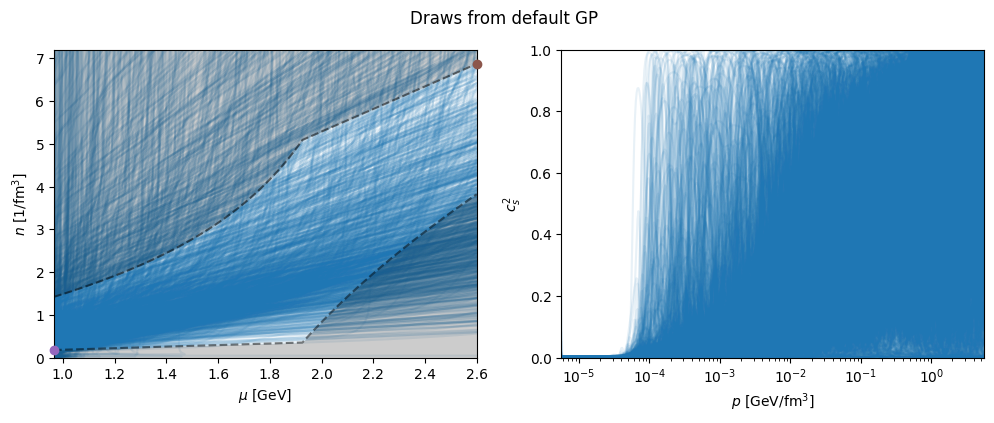

In [6]:
min_pressure = to_GeV_per_cubic_femtometre(1e10)
max_pressure = to_GeV_per_cubic_femtometre(1e16)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[1].set_xscale('log')
fig.suptitle('Draws from default GP')

# Theory predictions

axs[0].plot(constraints.muL, constraints.nL, 'o', c='C4', zorder=11, clip_on=False)
axs[0].plot(constraints.muH, constraints.nH, 'o', c='C5', zorder=11, clip_on=False)

ylim = [0, axs[0].get_ylim()[1]]

# Constraints

axs[0].fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
axs[0].fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

axs[0].plot(mu_array, constraints.nmin(mu_array), c='k', ls='--', alpha=0.5, zorder=10)
axs[0].plot(mu_array, constraints.nmax(mu_array), c='k', ls='--', alpha=0.5, zorder=10)

for n in collated_eos.eos[:2000]:

    eos = pd.read_csv(
        '../data/eos-draws-default/mrgagn/'
        f'DRAWmod1000-{int(n//1000):06}/eos-draw-{int(n):06}.csv'
    )

    pressure = to_GeV_per_cubic_femtometre(eos.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(eos.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(eos.baryon_density)

    chemical_potential = (energy_density+pressure)/number_density
    speed_of_sound_squared = np.gradient(pressure, energy_density)

    axs[0].plot(
        chemical_potential,
        number_density,
        c='C0',
        alpha=0.1,
        zorder=0.5
        )
    
    axs[1].plot(
        pressure,
        speed_of_sound_squared,
        c='C0',
        alpha=0.1,
        zorder=0.5
        )

axs[0].set_xlim(constraints.muL, constraints.muH)
axs[0].set_ylim(ylim)

axs[1].set_xlim(min_pressure, max_pressure)
axs[1].set_ylim(0, 1)

axs[0].set_xlabel(r'$\mu$ [GeV]')
axs[0].set_ylabel(r'$n$ [1/fm$^3$]')

axs[1].set_xlabel(r'$p$ [GeV/fm$^3$]')
axs[1].set_ylabel(r'$c_s^2$');

In [7]:
p_ref = dyn_per_square_cm_to_GeV_per_cubic_femtometer(5.4e31)

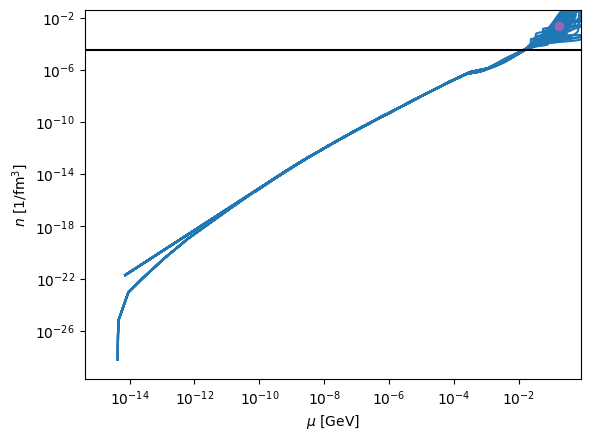

In [8]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

# Theory predictions

ax.plot(constraints.epsilonL, constraints.pL, 'o', c='C4', zorder=11, clip_on=False)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

for n in collated_eos.eos[:50]:

    eos = pd.read_csv(
        '../data/eos-draws-default/mrgagn/'
        f'DRAWmod1000-{int(n//1000):06}/eos-draw-{int(n):06}.csv'
    )

    pressure = to_GeV_per_cubic_femtometre(eos.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(eos.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(eos.baryon_density)

    chemical_potential = (energy_density+pressure)/number_density
    speed_of_sound_squared = np.gradient(pressure, energy_density)

    ax.plot(
        energy_density,
        pressure,
        c='C0',
        alpha=1,
        zorder=0.5
        )
    
ax.axhline(p_ref, c='k')
    
ax.set_xlim(ax.get_xlim()[0], 0.802125219727913)
ax.set_ylim(ax.get_ylim()[0], 0.040910214596746396)

ax.set_xlabel(r'$\mu$ [GeV]')
ax.set_ylabel(r'$n$ [1/fm$^3$]');

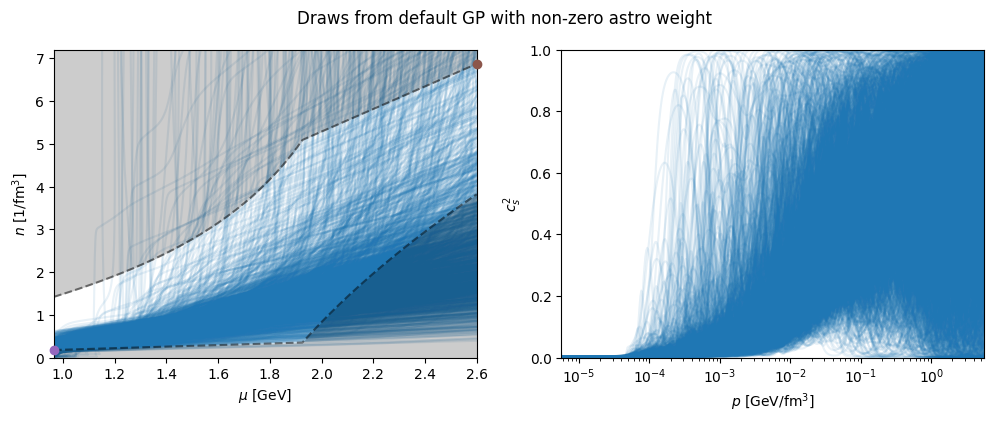

In [9]:
min_pressure = to_GeV_per_cubic_femtometre(1e10)
max_pressure = to_GeV_per_cubic_femtometre(1e16)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[1].set_xscale('log')
fig.suptitle('Draws from default GP with non-zero astro weight')

# Theory predictions

axs[0].plot(constraints.muL, constraints.nL, 'o', c='C4', zorder=11, clip_on=False)
axs[0].plot(constraints.muH, constraints.nH, 'o', c='C5', zorder=11, clip_on=False)

ylim = [0, axs[0].get_ylim()[1]]

# Constraints

axs[0].fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
axs[0].fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

axs[0].plot(mu_array, constraints.nmin(mu_array), c='k', ls='--', alpha=0.5, zorder=10)
axs[0].plot(mu_array, constraints.nmax(mu_array), c='k', ls='--', alpha=0.5, zorder=10)

astro_collated_eos = collated_eos[astro_weights > 0]
for n in astro_collated_eos.eos[:2000]:

    eos = pd.read_csv(
        '../data/eos-draws-default/mrgagn/'
        f'DRAWmod1000-{int(n//1000):06}/eos-draw-{int(n):06}.csv'
    )

    pressure = to_GeV_per_cubic_femtometre(eos.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(eos.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(eos.baryon_density)

    chemical_potential = (energy_density+pressure)/number_density
    speed_of_sound_squared = np.gradient(pressure, energy_density)

    axs[0].plot(
        chemical_potential,
        number_density,
        c='C0',
        alpha=0.1,
        zorder=0.5
        )
    
    axs[1].plot(
        pressure,
        speed_of_sound_squared,
        c='C0',
        alpha=0.1,
        zorder=0.5
        )

axs[0].set_xlim(constraints.muL, constraints.muH)
axs[0].set_ylim(ylim)

axs[1].set_xlim(min_pressure, max_pressure)
axs[1].set_ylim(0, 1)

axs[0].set_xlabel(r'$\mu$ [GeV]')
axs[0].set_ylabel(r'$n$ [1/fm$^3$]')

axs[1].set_xlabel(r'$p$ [GeV/fm$^3$]')
axs[1].set_ylabel(r'$c_s^2$');

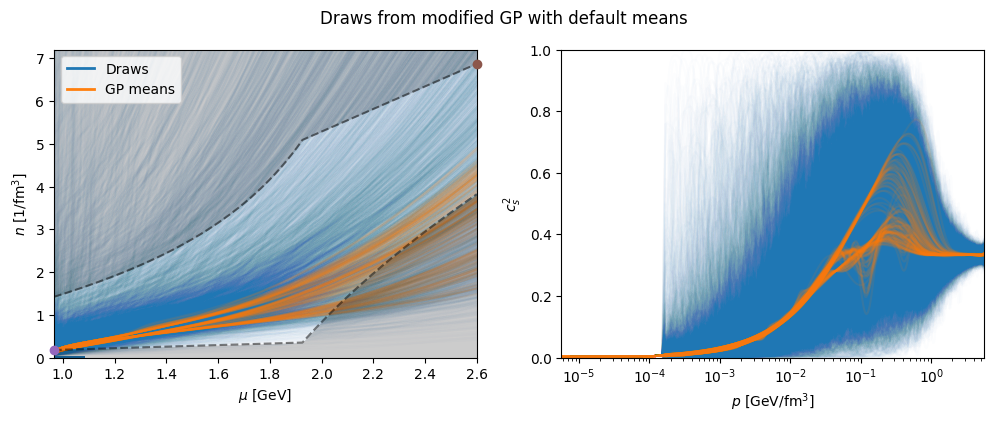

In [10]:
set_number = 6
varieties = ['had', 'hyp', 'qrk']
N = 2000

min_pressure = to_GeV_per_cubic_femtometre(1e10)
max_pressure = to_GeV_per_cubic_femtometre(1e16)

gp_mean_dict = {}
for variety in varieties:

    hdf5_path = (
        '../data/eos-draws-modified/tests/'
        f'{set_number:02}/{variety}agn/gpr_gpr_{variety}agn.hdf5'
    )

    gp_mean_dict[variety] = {}

    with h5py.File(hdf5_path, 'r') as f:
        for key in f.keys():

            cov = np.array(f[key]['cov'])
            mean = np.array(f[key]['mean'])

            log_pressure = np.array([entry[0] for entry in mean])
            phi = np.array([entry[1] for entry in mean])

            gp_mean_dict[variety][key] = (log_pressure, phi)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[1].set_xscale('log')
fig.suptitle('Draws from modified GP with default means')

# Theory predictions

axs[0].plot(constraints.muL, constraints.nL, 'o', c='C4', zorder=11, clip_on=False)
axs[0].plot(constraints.muH, constraints.nH, 'o', c='C5', zorder=11, clip_on=False)

ylim = [0, axs[0].get_ylim()[1]]

# Constraints

axs[0].fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
axs[0].fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

axs[0].plot(mu_array, constraints.nmin(mu_array), c='k', ls='--', alpha=0.5, zorder=10)
axs[0].plot(mu_array, constraints.nmax(mu_array), c='k', ls='--', alpha=0.5, zorder=10)

# Means

for variety in varieties:
    for key in gp_mean_dict[variety]:

        log_pressure, phi = gp_mean_dict[variety][key]

        eos, cols = integrate_phi(
            np.exp(log_pressure),
            phi,
            reference_pressurec2=3e11,
            sigma_logpressurec2=0,
            stitch_below_reference_pressure=True,
            include_baryon_density=True,
            include_cs2c2=True,
            include_baryon_chemical_potential=False,
            verbose=False
        )

        pressure_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('pressurec2')])
        energy_density_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('energy_densityc2')])
        number_density_mean = to_nucleons_per_cubic_femtometre(eos[:, cols.index('baryon_density')])

        chemical_potential_mean = (energy_density_mean+pressure_mean)/number_density_mean
        speed_of_sound_squared_mean = np.gradient(pressure_mean, energy_density_mean)

        axs[0].plot(
            chemical_potential_mean,
            number_density_mean,
            c='C1',
            alpha=0.1,
            zorder=0.9
            )
        
        axs[1].plot(
            pressure_mean,
            speed_of_sound_squared_mean,
            c='C1',
            alpha=0.1,
            zorder=0.9
            )

for variety in varieties:
    for n in range(N):

        eos = pd.read_csv(
            '../data/eos-draws-modified/tests/'
            f'{set_number:02}/{variety}agn/DRAWmod1000-{int(n/1000):06}/eos-draw-{n:06}.csv'
        )

        pressure = to_GeV_per_cubic_femtometre(eos.pressurec2)
        energy_density = to_GeV_per_cubic_femtometre(eos.energy_densityc2)
        number_density = to_nucleons_per_cubic_femtometre(eos.baryon_density)

        chemical_potential = (energy_density+pressure)/number_density
        speed_of_sound_squared = np.gradient(pressure, energy_density)

        axs[0].plot(
            chemical_potential,
            number_density,
            c='C0',
            alpha=0.01,
            zorder=0.5
            )
        
        axs[1].plot(
            pressure,
            speed_of_sound_squared,
            c='C0',
            alpha=0.01,
            zorder=0.5
            )
        
handles = [
    plt.Line2D([0], [0], color='C0', lw=2, label='Draws'),
    plt.Line2D([0], [0], color='C1', lw=2, label='GP means'),
]
labels = [
    'Draws',
    'GP means',
]
axs[0].legend(handles, labels, loc='upper left')

axs[0].set_xlim(constraints.muL, constraints.muH)
axs[0].set_ylim(ylim)

axs[1].set_xlim(min_pressure, max_pressure)
axs[1].set_ylim(0, 1)

axs[0].set_xlabel(r'$\mu$ [GeV]')
axs[0].set_ylabel(r'$n$ [1/fm$^3$]')

axs[1].set_xlabel(r'$p$ [GeV/fm$^3$]')
axs[1].set_ylabel(r'$c_s^2$');

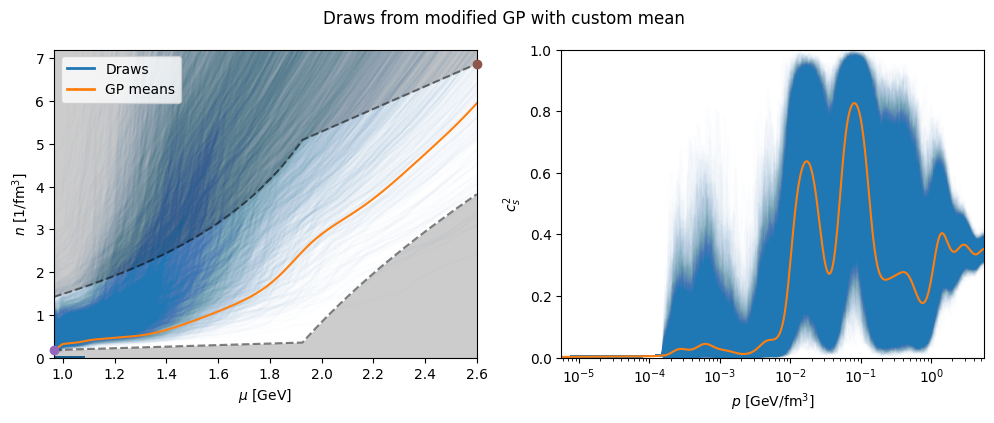

In [11]:
set_number = 9
varieties = ['qrk']
N = 5000

min_pressure = to_GeV_per_cubic_femtometre(1e10)
max_pressure = to_GeV_per_cubic_femtometre(1e16)

gp_mean_dict = {}
for variety in varieties:

    hdf5_path = (
        '../data/eos-draws-modified/tests/'
        f'{set_number:02}/{variety}agn/gpr_gpr_{variety}agn.hdf5'
    )

    gp_mean_dict[variety] = {}

    with h5py.File(hdf5_path, 'r') as f:
        for key in f.keys():

            cov = np.array(f[key]['cov'])
            mean = np.array(f[key]['mean'])

            log_pressure = np.array([entry[0] for entry in mean])
            phi = np.array([entry[1] for entry in mean])

            gp_mean_dict[variety][key] = (log_pressure, phi)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[1].set_xscale('log')
fig.suptitle('Draws from modified GP with custom mean')

# Theory predictions

axs[0].plot(constraints.muL, constraints.nL, 'o', c='C4', zorder=11, clip_on=False)
axs[0].plot(constraints.muH, constraints.nH, 'o', c='C5', zorder=11, clip_on=False)

ylim = [0, axs[0].get_ylim()[1]]

# Constraints

axs[0].fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
axs[0].fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

axs[0].plot(mu_array, constraints.nmin(mu_array), c='k', ls='--', alpha=0.5, zorder=10)
axs[0].plot(mu_array, constraints.nmax(mu_array), c='k', ls='--', alpha=0.5, zorder=10)

# Means

for variety in varieties:
    for key in gp_mean_dict[variety]:

        log_pressure, phi = gp_mean_dict[variety][key]

        eos, cols = integrate_phi(
            np.exp(log_pressure),
            phi,
            reference_pressurec2=3e11,
            sigma_logpressurec2=0,
            stitch_below_reference_pressure=True,
            include_baryon_density=True,
            include_cs2c2=True,
            include_baryon_chemical_potential=False,
            verbose=False
        )

        pressure_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('pressurec2')])
        energy_density_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('energy_densityc2')])
        number_density_mean = to_nucleons_per_cubic_femtometre(eos[:, cols.index('baryon_density')])

        chemical_potential_mean = (energy_density_mean+pressure_mean)/number_density_mean
        speed_of_sound_squared_mean = np.gradient(pressure_mean, energy_density_mean)

        axs[0].plot(
            chemical_potential_mean,
            number_density_mean,
            c='C1',
            alpha=1,
            zorder=0.9
            )
        
        axs[1].plot(
            pressure_mean,
            speed_of_sound_squared_mean,
            c='C1',
            alpha=1,
            zorder=0.9
            )

for variety in varieties:
    for n in range(N):

        eos = pd.read_csv(
            '../data/eos-draws-modified/tests/'
            f'{set_number:02}/{variety}agn/DRAWmod1000-{int(n/1000):06}/eos-draw-{n:06}.csv'
        )

        pressure = to_GeV_per_cubic_femtometre(eos.pressurec2)
        energy_density = to_GeV_per_cubic_femtometre(eos.energy_densityc2)
        number_density = to_nucleons_per_cubic_femtometre(eos.baryon_density)

        chemical_potential = (energy_density+pressure)/number_density
        speed_of_sound_squared = np.gradient(pressure, energy_density)

        axs[0].plot(
            chemical_potential,
            number_density,
            c='C0',
            alpha=0.01,
            zorder=0.5
            )
        
        axs[1].plot(
            pressure,
            speed_of_sound_squared,
            c='C0',
            alpha=0.01,
            zorder=0.5
            )
        
handles = [
    plt.Line2D([0], [0], color='C0', lw=2, label='Draws'),
    plt.Line2D([0], [0], color='C1', lw=2, label='GP means'),
]
labels = [
    'Draws',
    'GP means',
]
axs[0].legend(handles, labels, loc='upper left')

axs[0].set_xlim(constraints.muL, constraints.muH)
axs[0].set_ylim(ylim)

axs[1].set_xlim(min_pressure, max_pressure)
axs[1].set_ylim(0, 1)

axs[0].set_xlabel(r'$\mu$ [GeV]')
axs[0].set_ylabel(r'$n$ [1/fm$^3$]')

axs[1].set_xlabel(r'$p$ [GeV/fm$^3$]')
axs[1].set_ylabel(r'$c_s^2$');

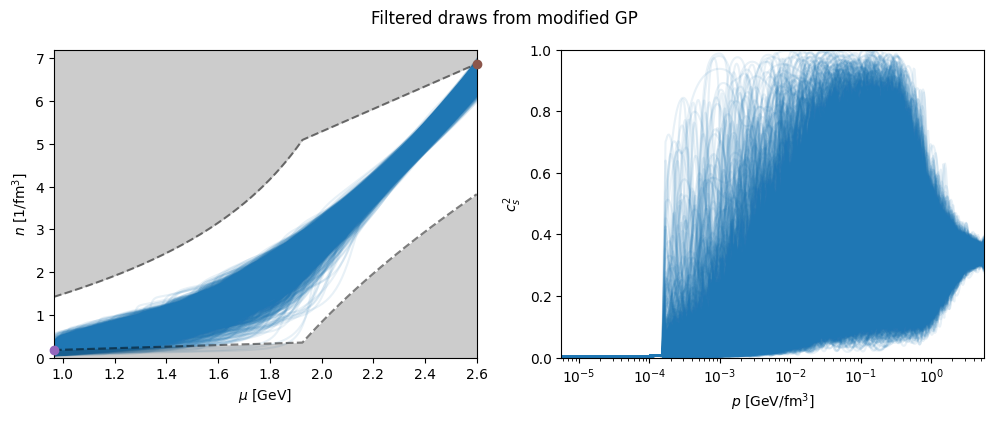

In [12]:
set_number = 12 # (now called GP1)
varieties = ['marg']
N = 6331

min_pressure = to_GeV_per_cubic_femtometre(1e10)
max_pressure = to_GeV_per_cubic_femtometre(1e16)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[1].set_xscale('log')
fig.suptitle('Filtered draws from modified GP')

# Theory predictions

axs[0].plot(constraints.muL, constraints.nL, 'o', c='C4', zorder=11, clip_on=False)
axs[0].plot(constraints.muH, constraints.nH, 'o', c='C5', zorder=11, clip_on=False)

ylim = [0, axs[0].get_ylim()[1]]

# Constraints

axs[0].fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
axs[0].fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

axs[0].plot(mu_array, constraints.nmin(mu_array), c='k', ls='--', alpha=0.5, zorder=10)
axs[0].plot(mu_array, constraints.nmax(mu_array), c='k', ls='--', alpha=0.5, zorder=10)

for variety in varieties:
    for n in range(N):

        eos = pd.read_csv(
            f'../data/eos-draws-modified/gp1/'
            f'{variety}agn/DRAWmod1000-{int(n/1000):06}/eos-draw-{n:06}.csv'
            )

        pressure = to_GeV_per_cubic_femtometre(eos.pressurec2)
        energy_density = to_GeV_per_cubic_femtometre(eos.energy_densityc2)
        number_density = to_nucleons_per_cubic_femtometre(eos.baryon_density)

        chemical_potential = (energy_density+pressure)/number_density
        speed_of_sound_squared = np.gradient(pressure, energy_density)

        axs[0].plot(
            chemical_potential,
            number_density,
            c='C0',
            alpha=0.1,
            zorder=0.5
            )
        
        axs[1].plot(
            pressure,
            speed_of_sound_squared,
            c='C0',
            alpha=0.1,
            zorder=0.5
            )

axs[0].set_xlim(constraints.muL, constraints.muH)
axs[0].set_ylim(ylim)

axs[1].set_xlim(min_pressure, max_pressure)
axs[1].set_ylim(0, 1)

axs[0].set_xlabel(r'$\mu$ [GeV]')
axs[0].set_ylabel(r'$n$ [1/fm$^3$]')

axs[1].set_xlabel(r'$p$ [GeV/fm$^3$]')
axs[1].set_ylabel(r'$c_s^2$');

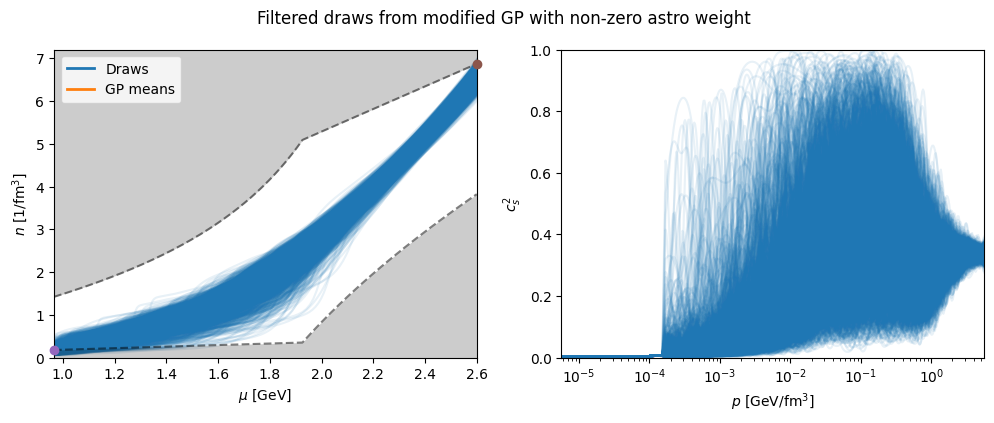

In [13]:
set_number = 12 # (now called GP1)
collated_eos = pd.read_csv(
    f'../data/eos-draws-modified/gp1/eos-draws-modified-gp1.csv', index_col=0
)

min_pressure = to_GeV_per_cubic_femtometre(1e10)
max_pressure = to_GeV_per_cubic_femtometre(1e16)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[1].set_xscale('log')
fig.suptitle('Filtered draws from modified GP with non-zero astro weight')

# Theory predictions

axs[0].plot(constraints.muL, constraints.nL, 'o', c='C4', zorder=11, clip_on=False)
axs[0].plot(constraints.muH, constraints.nH, 'o', c='C5', zorder=11, clip_on=False)

ylim = [0, axs[0].get_ylim()[1]]

# Constraints

axs[0].fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
axs[0].fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

axs[0].plot(mu_array, constraints.nmin(mu_array), c='k', ls='--', alpha=0.5, zorder=10)
axs[0].plot(mu_array, constraints.nmax(mu_array), c='k', ls='--', alpha=0.5, zorder=10)

for n, data in collated_eos.iloc[:6331].iterrows():

    if data['logweight_total'] > -np.inf:

        eos = pd.read_csv(
            f'../data/eos-draws-modified/gp1/margagn/DRAWmod1000-{int(n/1000):06}/eos-draw-{n:06}.csv'
            )

        pressure = to_GeV_per_cubic_femtometre(eos.pressurec2)
        energy_density = to_GeV_per_cubic_femtometre(eos.energy_densityc2)
        number_density = to_nucleons_per_cubic_femtometre(eos.baryon_density)

        chemical_potential = (energy_density+pressure)/number_density
        speed_of_sound_squared = np.gradient(pressure, energy_density)

        axs[0].plot(
            chemical_potential,
            number_density,
            c='C0',
            alpha=0.1,
            zorder=0.5
            )
        
        axs[1].plot(
            pressure,
            speed_of_sound_squared,
            c='C0',
            alpha=0.1,
            zorder=0.5
            )
        
handles = [
    plt.Line2D([0], [0], color='C0', lw=2, label='Draws'),
    plt.Line2D([0], [0], color='C1', lw=2, label='GP means'),
]
labels = [
    'Draws',
    'GP means',
]
axs[0].legend(handles, labels, loc='upper left')

axs[0].set_xlim(constraints.muL, constraints.muH)
axs[0].set_ylim(ylim)

axs[1].set_xlim(min_pressure, max_pressure)
axs[1].set_ylim(0, 1)

axs[0].set_xlabel(r'$\mu$ [GeV]')
axs[0].set_ylabel(r'$n$ [1/fm$^3$]')

axs[1].set_xlabel(r'$p$ [GeV/fm$^3$]')
axs[1].set_ylabel(r'$c_s^2$');

In [14]:
def make_summary_plot(set_number, varieties, N, draw_alpha=0.01, mean_alpha=1):
    
    min_pressure = to_GeV_per_cubic_femtometre(1e10)
    max_pressure = to_GeV_per_cubic_femtometre(1e16)

    gp_mean_dict = {}
    for variety in varieties:

        hdf5_path = (
            '../data/eos-draws-modified/tests/'
            f'{set_number:02}/{variety}/gpr_gpr_{variety}.hdf5'
        )

        gp_mean_dict[variety] = {}

        with h5py.File(hdf5_path, 'r') as f:
            for key in f.keys():

                cov = np.array(f[key]['cov'])
                mean = np.array(f[key]['mean'])

                log_pressure = np.array([entry[0] for entry in mean])
                phi = np.array([entry[1] for entry in mean])

                gp_mean_dict[variety][key] = (log_pressure, phi)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    axs[1].set_xscale('log')
    fig.suptitle('Draws from modified GP with custom mean')

    # Theory predictions

    for X in [0.5, 2]:

        pQCDX = pqcd.pQCD(X)
        nH, pH = pQCDX.nH(muH), pQCDX.pH(muH)
        epsilonH = pqcd.epsilon_func(muH, nH, pH)

        constraints = pqcd.constraints(muL, nL, pL, muH, nH, pH)

        axs[0].plot(constraints.muL, constraints.nL, 'o', c='C4', zorder=11, clip_on=False)
        axs[0].plot(constraints.muH, constraints.nH, 'o', c='C5', zorder=11, clip_on=False)

        ylim = [0, axs[0].get_ylim()[1]]

        # Constraints

        axs[0].plot(mu_array, constraints.nmin(mu_array), c='k', ls='--', alpha=0.5, zorder=10)
        axs[0].plot(mu_array, constraints.nmax(mu_array), c='k', ls='--', alpha=0.5, zorder=10)

    # Means

    for variety in varieties:
        for key in gp_mean_dict[variety]:

            log_pressure, phi = gp_mean_dict[variety][key]

            eos, cols = integrate_phi(
                np.exp(log_pressure),
                phi,
                reference_pressurec2=3e11,
                sigma_logpressurec2=0,
                stitch_below_reference_pressure=True,
                include_baryon_density=True,
                include_cs2c2=True,
                include_baryon_chemical_potential=False,
                verbose=False
            )

            pressure_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('pressurec2')])
            energy_density_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('energy_densityc2')])
            number_density_mean = to_nucleons_per_cubic_femtometre(eos[:, cols.index('baryon_density')])

            chemical_potential_mean = (energy_density_mean+pressure_mean)/number_density_mean
            speed_of_sound_squared_mean = np.gradient(pressure_mean, energy_density_mean)

            axs[0].plot(
                chemical_potential_mean,
                number_density_mean,
                c='C1',
                alpha=mean_alpha,
                zorder=0.9
                )
            
            axs[1].plot(
                pressure_mean,
                speed_of_sound_squared_mean,
                c='C1',
                alpha=mean_alpha,
                zorder=0.9
                )

    for variety in varieties:
        for n in range(N):

            try:

                eos = pd.read_csv(
                    '../data/eos-draws-modified/tests/'
                    f'{set_number:02}/{variety}/DRAWmod1000-{int(n/1000):06}/eos-draw-{n:06}.csv'
                    )

                pressure = to_GeV_per_cubic_femtometre(eos.pressurec2)
                energy_density = to_GeV_per_cubic_femtometre(eos.energy_densityc2)
                number_density = to_nucleons_per_cubic_femtometre(eos.baryon_density)

                chemical_potential = (energy_density+pressure)/number_density
                speed_of_sound_squared = np.gradient(pressure, energy_density)

                axs[0].plot(
                    chemical_potential,
                    number_density,
                    c='C0',
                    alpha=draw_alpha,
                    zorder=0.5
                    )
                
                axs[1].plot(
                    pressure,
                    speed_of_sound_squared,
                    c='C0',
                    alpha=draw_alpha,
                    zorder=0.5
                    )
                
            except:
                pass
            
    handles = [
        plt.Line2D([0], [0], color='C0', lw=2, label='Draws'),
        plt.Line2D([0], [0], color='C1', lw=2, label='GP means'),
    ]
    labels = [
        'Draws',
        'GP means',
    ]
    axs[0].legend(handles, labels, loc='upper left')

    axs[0].set_xlim(constraints.muL, constraints.muH)
    axs[0].set_ylim(ylim)

    axs[1].set_xlim(min_pressure, max_pressure)
    axs[1].set_ylim(0, 1)

    axs[0].set_xlabel(r'$\mu$ [GeV]')
    axs[0].set_ylabel(r'$n$ [1/fm$^3$]')

    axs[1].set_xlabel(r'$p$ [GeV/fm$^3$]')
    axs[1].set_ylabel(r'$c_s^2$');

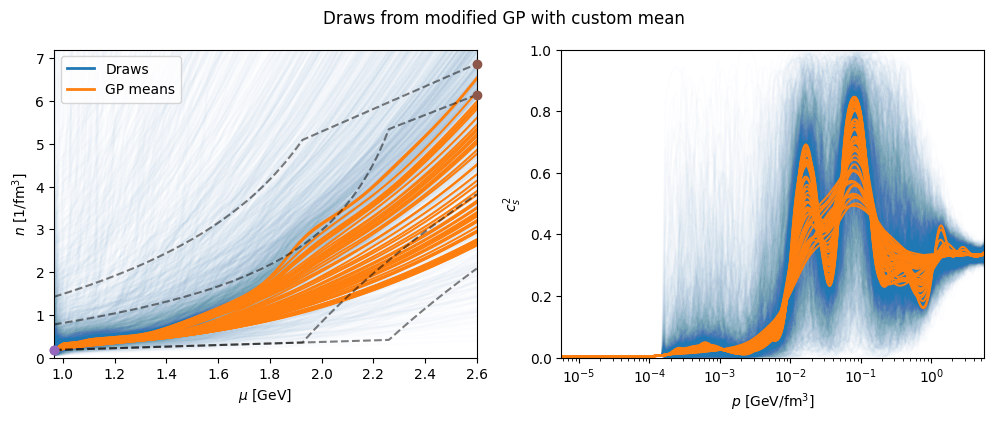

In [15]:
make_summary_plot(14, ['cusagn'], 2000)

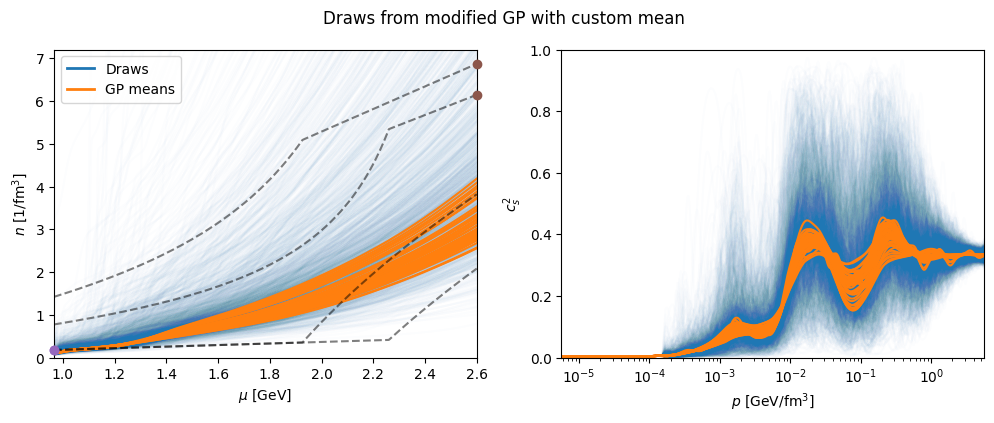

In [16]:
make_summary_plot(15, ['cusagn'], 2000)

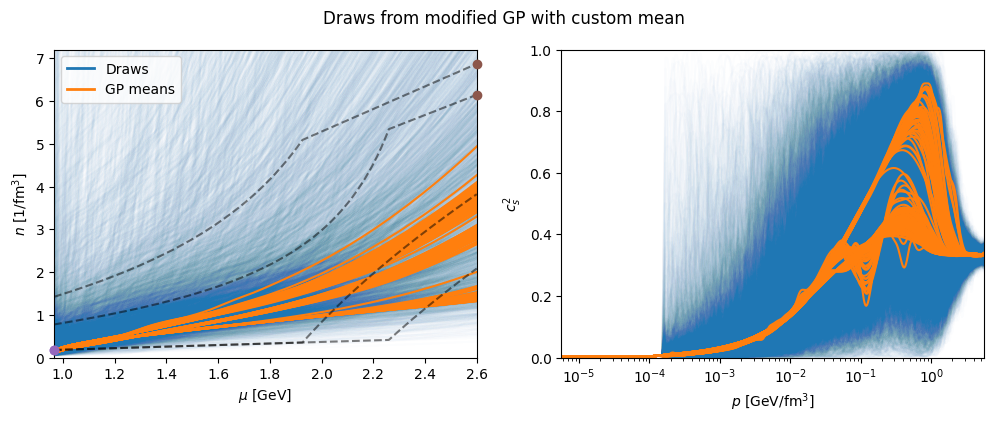

In [17]:
make_summary_plot(16, ['hadagn', 'hypagn', 'qrkagn'], 2000)

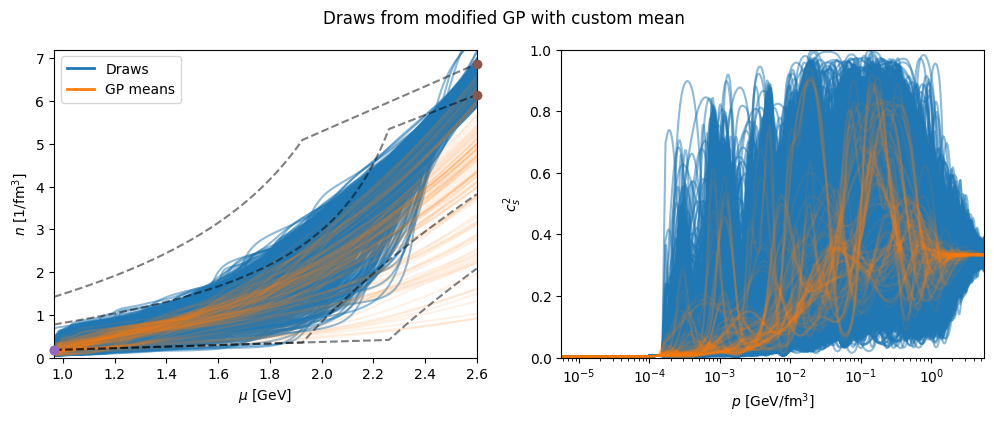

In [18]:
make_summary_plot(
    17, 
    [
        'cusaagn', 'cusbagn', 'cuscagn', 'cusdagn', 'cuseagn', 'cusfagn', 
        'cusgagn', 'cushagn', 'cusiagn', 'cusjagn', 'cuskagn'
    ],
    2000,
    mean_alpha=0.1,
    draw_alpha=0.5
)

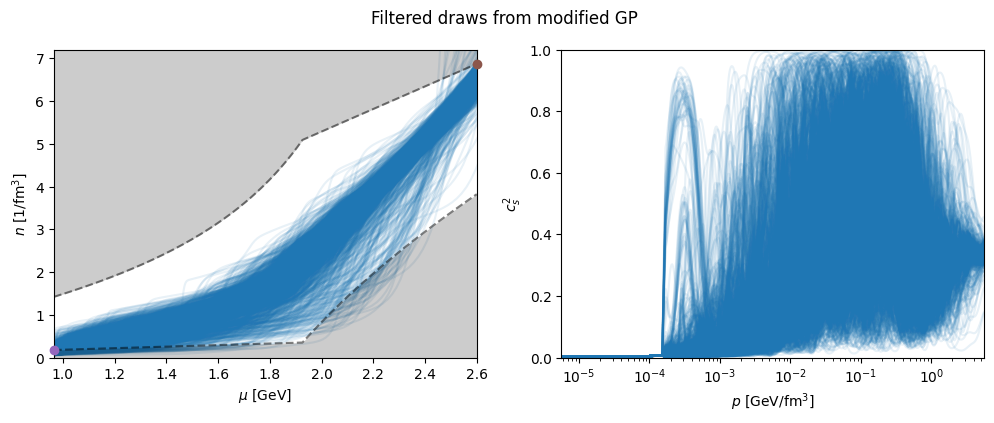

In [19]:
set_number = 24
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
counts = {'a': 109, 'b': 187, 'c': 86, 'd': 108, 'e': 156, 'f': 139, 'g': 170, 'h': 78, 'i': 96, 'j': 191}

min_pressure = to_GeV_per_cubic_femtometre(1e10)
max_pressure = to_GeV_per_cubic_femtometre(1e16)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[1].set_xscale('log')
fig.suptitle('Filtered draws from modified GP')

# Theory predictions

axs[0].plot(constraints.muL, constraints.nL, 'o', c='C4', zorder=11, clip_on=False)
axs[0].plot(constraints.muH, constraints.nH, 'o', c='C5', zorder=11, clip_on=False)

ylim = [0, axs[0].get_ylim()[1]]

# Constraints

axs[0].fill_between(mu_array, constraints.nmin(mu_array), ylim[0], color='k', alpha=0.2, lw=0)
axs[0].fill_between(mu_array, constraints.nmax(mu_array), ylim[1], color='k', alpha=0.2, lw=0)

axs[0].plot(mu_array, constraints.nmin(mu_array), c='k', ls='--', alpha=0.5, zorder=10)
axs[0].plot(mu_array, constraints.nmax(mu_array), c='k', ls='--', alpha=0.5, zorder=10)

for label in labels:

    N = counts[label]
    for n in range(N):

        eos = pd.read_csv(
            '../data/eos-draws-modified/tests/'
            f'{set_number:02}/cus{label}agn/DRAWmod1000-{int(n/1000):06}/eos-draw-{n:06}.csv'
            )

        pressure = to_GeV_per_cubic_femtometre(eos.pressurec2)
        energy_density = to_GeV_per_cubic_femtometre(eos.energy_densityc2)
        number_density = to_nucleons_per_cubic_femtometre(eos.baryon_density)

        chemical_potential = (energy_density+pressure)/number_density
        speed_of_sound_squared = np.gradient(pressure, energy_density)

        axs[0].plot(
            chemical_potential,
            number_density,
            c='C0',
            alpha=0.1,
            zorder=0.5
            )
        
        axs[1].plot(
            pressure,
            speed_of_sound_squared,
            c='C0',
            alpha=0.1,
            zorder=0.5
            )

axs[0].set_xlim(constraints.muL, constraints.muH)
axs[0].set_ylim(ylim)

axs[1].set_xlim(min_pressure, max_pressure)
axs[1].set_ylim(0, 1)

axs[0].set_xlabel(r'$\mu$ [GeV]')
axs[0].set_ylabel(r'$n$ [1/fm$^3$]')

axs[1].set_xlabel(r'$p$ [GeV/fm$^3$]')
axs[1].set_ylabel(r'$c_s^2$');